In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_STATE_SEED = 12
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

In [32]:
# read the data
df = pd.read_csv("02-14-2018.csv")
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,80,6,14/02/2018 10:53:23,10156986,5,5,1089,1923,587,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048571,80,6,14/02/2018 10:53:33,117,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048572,80,6,14/02/2018 10:53:28,5095331,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
1048573,80,6,14/02/2018 10:53:28,5235511,3,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [33]:
#making a dataframe with the most important columns
dfs=df[['Dst Port', 'Protocol', 'Flow Duration','Tot Fwd Pkts','TotLen Bwd Pkts', 'Label']]

<AxesSubplot:>

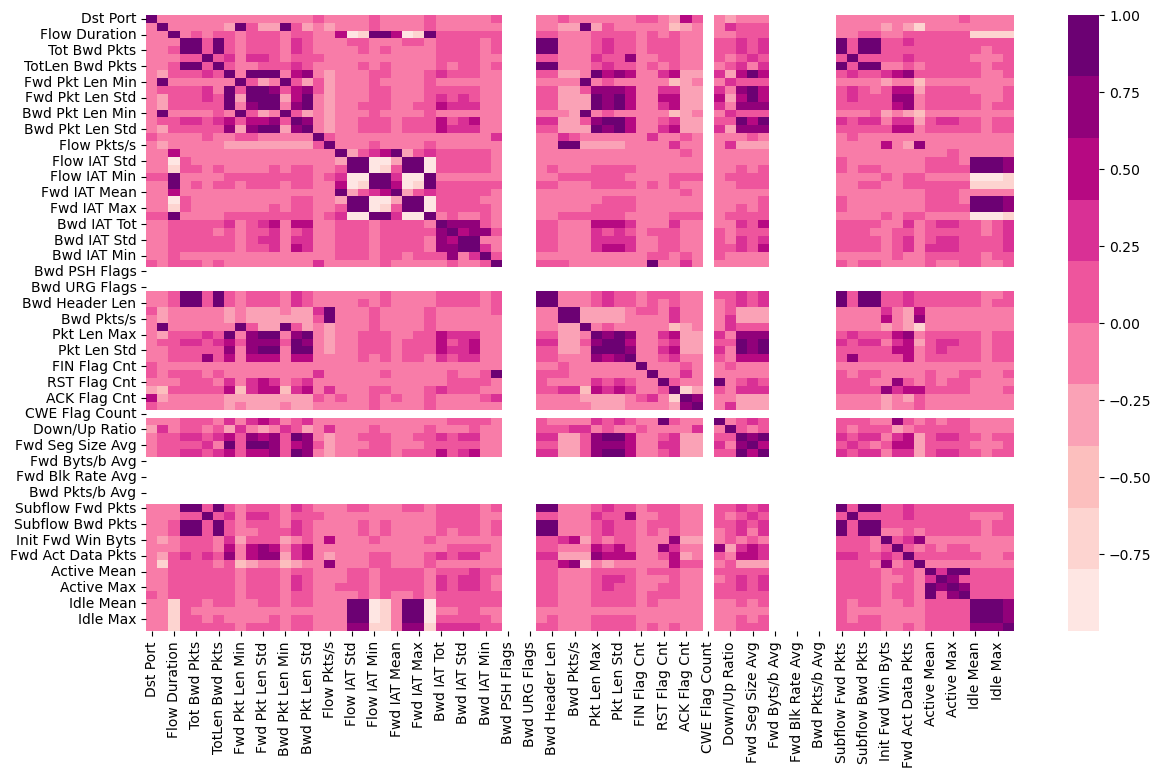

In [76]:
fig, ax = plt.subplots(figsize=(14,8))         
sns.heatmap(df.corr(),
            cmap= sns.color_palette("RdPu", 10),
            ax=ax)

# Read CSV files with specific columns

In [34]:
# Columns to keep
selected_columns = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'TotLen Bwd Pkts', 'Label']

In [35]:
df2 = pd.read_csv("02-15-2018.csv", usecols=selected_columns)

In [36]:
df3 = pd.read_csv("02-16-2018.csv", usecols=selected_columns)

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_53148/3718212113.py:1: DtypeWarning: Columns (0,1,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("02-16-2018.csv", usecols=selected_columns)


In [37]:
df4 = pd.read_csv("02-20-2018.csv", usecols=selected_columns)

In [38]:
df5 = pd.read_csv("02-21-2018.csv", usecols=selected_columns)

In [39]:
df6 = pd.read_csv("02-22-2018.csv", usecols=selected_columns)

In [40]:
df7 = pd.read_csv("02-23-2018.csv", usecols=selected_columns)

In [41]:
df8 = pd.read_csv("02-28-2018.csv", usecols=selected_columns)

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_53148/950012469.py:1: DtypeWarning: Columns (0,1,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df8 = pd.read_csv("02-28-2018.csv", usecols=selected_columns)


In [42]:
df9 = pd.read_csv("03-01-2018.csv", usecols=selected_columns)

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_53148/2447146421.py:1: DtypeWarning: Columns (0,1,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df9 = pd.read_csv("03-01-2018.csv", usecols=selected_columns)


In [43]:
df10 = pd.read_csv("03-02-2018.csv", usecols=selected_columns)

In [44]:
one=pd.concat([dfs, df2,df3,df4,df5,df6,df7,df8,df9,df10])

# Pre-prosessing

In [45]:
one

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Bwd Pkts,Label
0,0,0,112641719,3,0,Benign
1,0,0,112641466,3,0,Benign
2,0,0,112638623,3,0,Benign
3,22,6,6453966,15,2273,Benign
4,22,6,8804066,14,2209,Benign
...,...,...,...,...,...,...
1048570,3389,6,3982183,14,1731.0,Benign
1048571,3389,6,3802316,14,1731.0,Benign
1048572,3389,6,4004239,14,1731.0,Benign
1048573,3389,6,3998435,14,1731.0,Benign


In [46]:
one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16233002 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Dst Port         object
 1   Protocol         object
 2   Flow Duration    object
 3   Tot Fwd Pkts     object
 4   TotLen Bwd Pkts  object
 5   Label            object
dtypes: object(6)
memory usage: 866.9+ MB


In [47]:
#convert to float
columns_to_convert = ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'TotLen Bwd Pkts']
# Convert specified columns to numeric, replacing non-convertible values with NaN
one[columns_to_convert] = one[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert to integers, replacing NaN with a default value if needed
one[columns_to_convert] = one[columns_to_convert].fillna(0).astype(int)

In [48]:
one

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Bwd Pkts,Label
0,0,0,112641719,3,0,Benign
1,0,0,112641466,3,0,Benign
2,0,0,112638623,3,0,Benign
3,22,6,6453966,15,2273,Benign
4,22,6,8804066,14,2209,Benign
...,...,...,...,...,...,...
1048570,3389,6,3982183,14,1731,Benign
1048571,3389,6,3802316,14,1731,Benign
1048572,3389,6,4004239,14,1731,Benign
1048573,3389,6,3998435,14,1731,Benign


In [49]:
one.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,TotLen Bwd Pkts
count,1.623300e+07,1.623300e+07,1.623300e+07,1.623300e+07,1.623300e+07
mean,9.164040e+03,8.754082e+00,1.181376e+07,2.353311e+01,4.730914e+03
std,1.892222e+04,4.920137e+00,4.940115e+08,1.521134e+03,2.344654e+05
min,0.000000e+00,0.000000e+00,-9.190110e+11,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,4.920000e+02,1.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,2.097000e+04,2.000000e+00,1.010000e+02
75%,3.389000e+03,1.700000e+01,3.002090e+06,5.000000e+00,5.820000e+02
max,6.553500e+04,1.700000e+01,1.200000e+08,3.096290e+05,1.563604e+08


In [50]:
# drop missing values
one.dropna(inplace=True)

In [51]:
#value count of the types of DDos attacks
one["Label"].value_counts()

Benign                      13484708
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193360
SSH-Bruteforce                187589
Infilteration                 161934
DoS attacks-SlowHTTPTest      139890
DoS attacks-GoldenEye          41508
DoS attacks-Slowloris          10990
DDOS attack-LOIC-UDP            1730
Brute Force -Web                 611
Brute Force -XSS                 230
SQL Injection                     87
Label                             59
Name: Label, dtype: int64

In [52]:
#we want to drop the rows that has small samples
values_to_drop = ['DoS attacks-GoldenEye', 'DoS attacks-Slowloris', 'DDOS attack-LOIC-UDP',
                  'Brute Force -Web', 'Brute Force -XSS', 'SQL Injection', 'Label']
one = one[~one['Label'].isin(values_to_drop)]

In [53]:
one["Label"].value_counts()

Benign                      13484708
DDOS attack-HOIC              686012
DDoS attacks-LOIC-HTTP        576191
DoS attacks-Hulk              461912
Bot                           286191
FTP-BruteForce                193360
SSH-Bruteforce                187589
Infilteration                 161934
DoS attacks-SlowHTTPTest      139890
Name: Label, dtype: int64

In [54]:
#replace the labels with numbers
label_mapping = {
    'Benign': 0,
    'DDOS attack-HOIC': 1,
    'DDoS attacks-LOIC-HTTP': 1,
    'DoS attacks-Hulk': 1,
    'Bot': 1,
    'FTP-BruteForce': 1,
    'SSH-Bruteforce': 1,
    'Infilteration': 1,
    'DoS attacks-SlowHTTPTest': 1
}
one['Label'] = one['Label'].replace(label_mapping)

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_53148/1429776598.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one['Label'] = one['Label'].replace(label_mapping)


In [55]:
one["Label"].value_counts()

0    13484708
1     2693079
Name: Label, dtype: int64

In [56]:
one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16177787 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column           Dtype
---  ------           -----
 0   Dst Port         int64
 1   Protocol         int64
 2   Flow Duration    int64
 3   Tot Fwd Pkts     int64
 4   TotLen Bwd Pkts  int64
 5   Label            int64
dtypes: int64(6)
memory usage: 864.0 MB


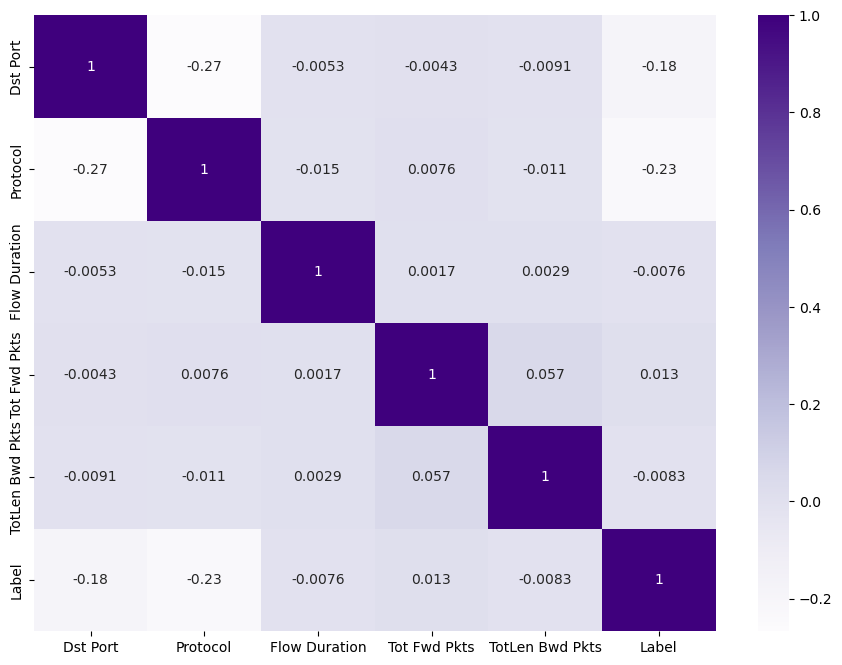

In [57]:
#Total forward packets has a high relationship with Total backward packets
fs = pd.get_dummies(one, dtype=float)
corrmat = fs.corr()

plt.figure(figsize=(11, 8))

# Define the colormap
cmap = sns.diverging_palette(70, 20, s=50, l=40, n=6, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap='Purples')

plt.show()

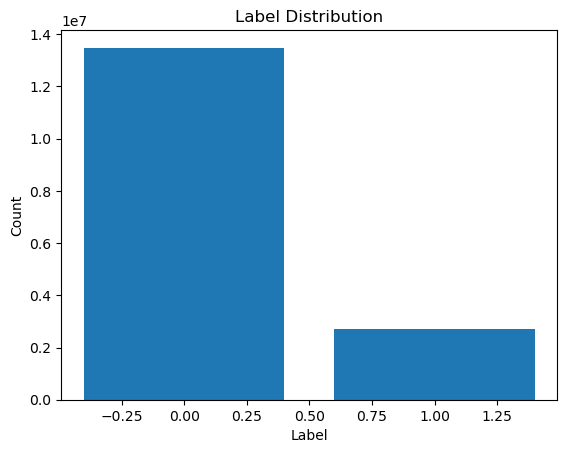

In [58]:
#the data is unbalanced
label_counts = one['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

# Under Sampler

In [59]:
# Separate majority (Benign) and minority classes
majority_class = one[one['Label'] == 0]
minority_classes = one[one['Label'] != 0]

# Specify the desired number of samples for the majority class
desired_samples = len(minority_classes)

# Undersample the majority class to match the minority class size
undersampled_majority = resample(majority_class, replace=False, n_samples=3484708, random_state=42)

# Concatenate the undersampled majority class with the minority classes
balanced_data = pd.concat([undersampled_majority, minority_classes])

# Verify the class distribution in the balanced dataset
print(balanced_data['Label'].value_counts())
one=balanced_data

0    3484708
1    2693079
Name: Label, dtype: int64


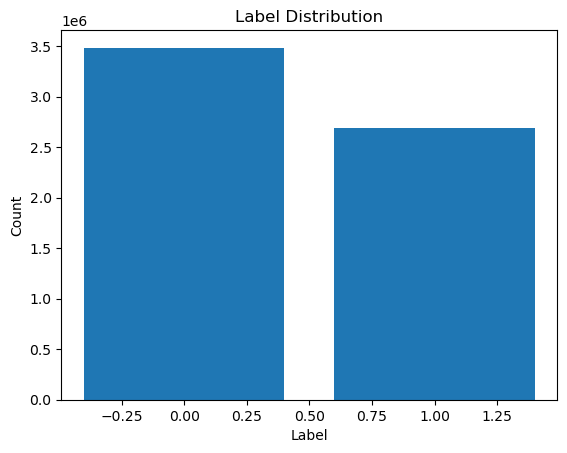

In [60]:
#the data is unbalanced
label_counts = one['Label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [69]:
#there is just 3 protcols
df['Protocol'].value_counts()

6     829309
17    207384
0      11882
Name: Protocol, dtype: int64

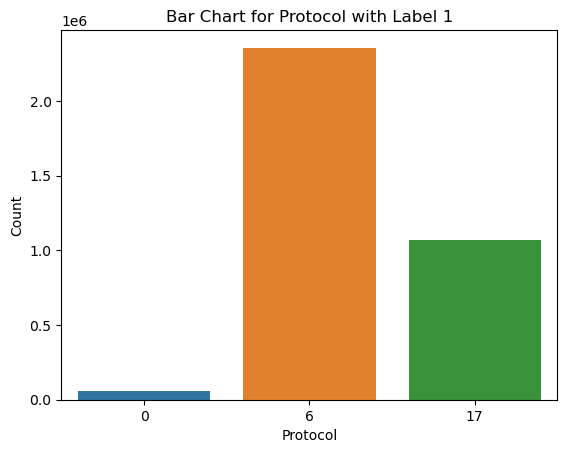

In [84]:
# Assuming df is your DataFrame
label_1_data = one[one['Label'] == 0]

# Check if there is any data for label 1
if not label_1_data.empty:
    protocol_counts_label_1 = label_1_data['Protocol'].value_counts()

    # Create a bar chart using Seaborn
    sns.barplot(x=protocol_counts_label_1.index, y=protocol_counts_label_1.values)
    plt.xlabel('Protocol')
    plt.ylabel('Count')
    plt.title('Bar Chart for Protocol with Label 1')
    plt.show()

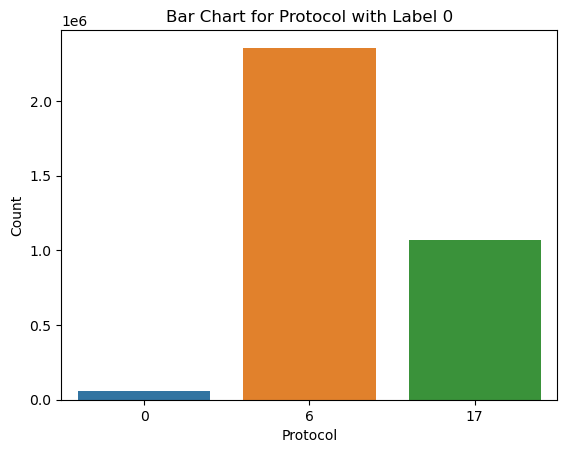

In [86]:
# Assuming df is your DataFrame
label_1_data = one[one['Label'] == 0]

# Check if there is any data for label 1
if not label_1_data.empty:
    protocol_counts_label_1 = label_1_data['Protocol'].value_counts()

    # Create a bar chart using Seaborn
    sns.barplot(x=protocol_counts_label_1.index, y=protocol_counts_label_1.values)
    plt.xlabel('Protocol')
    plt.ylabel('Count')
    plt.title('Bar Chart for Protocol with Label 0')
    plt.show()

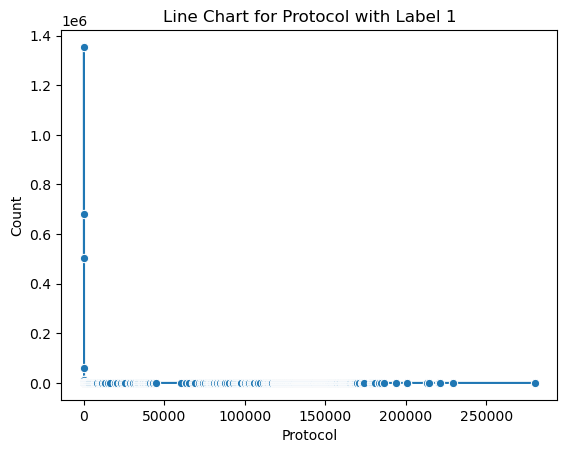

In [95]:
# Assuming df is your DataFrame
label_1_data = one[one['Label'] == 1]

# Check if there is any data for label 1
if not label_1_data.empty:
    protocol_counts_label_1 = label_1_data['Tot Fwd Pkts'].value_counts()

    # Create a line chart using Seaborn
    sns.lineplot(x=protocol_counts_label_1.index, y=protocol_counts_label_1.values, marker='o')
    plt.xlabel('Protocol')
    plt.ylabel('Count')
    plt.title('Line Chart for Protocol with Label 1')
    plt.show()
else:
    print("No data available for label 1.")


In [87]:
one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6177787 entries, 6498211 to 357420
Data columns (total 6 columns):
 #   Column           Dtype
---  ------           -----
 0   Dst Port         int64
 1   Protocol         int64
 2   Flow Duration    int64
 3   Tot Fwd Pkts     int64
 4   TotLen Bwd Pkts  int64
 5   Label            int64
dtypes: int64(6)
memory usage: 329.9 MB


In [97]:
one.to_csv("DDosa.csv", index=False)

# Ml

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [62]:
X=one.iloc[:,:5]
y=one.iloc[:,5:]
y

,Label
6498211,0
6108619,0
78436,0
5501285,0
449668,0
...,...
356594,1
356709,1
356768,1
357370,1


In [63]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
random_forest.fit(X_train, y_train)

/var/folders/2_/5rflfrqj113fggyw5wy7lzpm0000gn/T/ipykernel_53148/2566748861.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [66]:
y_pred = random_forest.predict(X_test)

In [67]:
# Additional evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    697374
           1       0.97      0.95      0.96    538184

    accuracy                           0.96   1235558
   macro avg       0.96      0.96      0.96   1235558
weighted avg       0.96      0.96      0.96   1235558

